In [4]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image

In [13]:
detections[1]

Detections(xyxy=array([[1447.,  320., 1516.,  481.]]), mask=None, confidence=array([0.79228538]), class_id=array([0]), tracker_id=None, data={'class_name': array(['person'], dtype='<U6')}, metadata={})

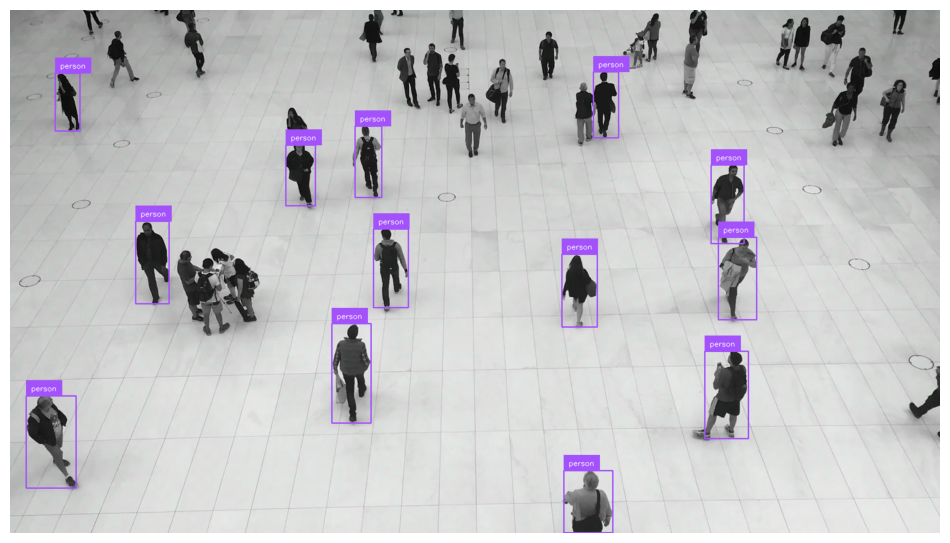

In [30]:
# load the image from an url
image = load_image_from_url("https://media.roboflow.com/inference/people-walking.jpg")

# load a pre-trained yolov8n model
model = get_model(model_id="yolov11n-1280")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# create supervision annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)